In [1]:
from tracing.rl.actions import *
from tracing.rl.a3cmodel import A3CModel
from tracing.rl.rewards import PopupRewardsCalculator
from tracing.rl.environment import Environment
from tracing.rl.actor_learner import ActionsMemory
from tracing.rl.actor_learner import ActorLearnerWorker
import tensorflow as tf
import threading
import csv, re

/home/aleksei/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
popup_urls = [
    # Choose from two options popups
    'monstervape.com',
    'twistedcigs.com',
    'ecigsejuice.com',
    'vape-fuel.com',
    'www.powervapes.net/products/',
    'ecigexpress.com',
    'ecigvaporstore.com',
    
    # Subscribe
    'cigarmanor.com',
    
    # Enter date popups
    'thecigarshop.com',
    'cigartowns.com',
    'docssmokeshop.com',
    'enhancedecigs.com',
    'betamorphecigs.com',
    
    # Accept Cookie
    'theglamourshop.com'
]

no_popup_urls = [
    'dixieems.com',
    'firstfitness.com',
    'sandlakedermatology.com',
    'dixieems.com',
    'anabolicwarfare.com',
    'jonessurgical.com',
    'srandd.com'
]


smoke_urls = []
pattern = '(smok)|(cig)|(vape)|(tobac)'
with open('../../resources/pvio_vio_us_ca_uk_sample1.csv') as f:
    rows = csv.reader(f)
    for row in rows:
        url = row[0]
        if re.match(pattern, url):
            smoke_urls.append(url)

print('Found {} url'.format(len(smoke_urls)))
#popup_urls = smoke_urls

Found 701 url


In [3]:
tf.reset_default_graph()
session = tf.Session()

num_workers = 4

global_model = A3CModel(len(Actions.actions), session = session)
global_model.init()
workers = []
#popup_urls = ['cigartowns.com']

for i in range(num_workers):
    env = Environment(PopupRewardsCalculator(), user={}, headless=True)
    worker = ActorLearnerWorker("worker-{}".format(i), popup_urls,
                                      global_model, env, 10000, 
                                lr=0.001, 
                                entropy_l=0.2, 
                                dropout = 0.8, 
                                gamma=0.99)
    workers.append(worker)

    worker.local_model.init()
    
coord = tf.train.Coordinator()



started url http://cigartowns.com


started url http://ecigvaporstore.com


started url http://twistedcigs.com


started url http://cigarmanor.com
controls: 1, covered: 0
control: Control: link, label: https://www.tucowsdomains.com/, values: None, min: None, max = None
got probabilities: [4.7654716e-08 1.2601175e-06 2.5960460e-07 6.3802280e-02 9.3619621e-01]
got action: Do Nothing
controls: 1, covered: 0
controls: 1, covered: 0
reward: 0
controls: 10, covered: 8


started url http://theglamourshop.com
got score: -1.3065634
estimated score: -1.3065634


Exception in thread Thread-11:
Traceback (most recent call last):
  File "/home/aleksei/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/aleksei/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-4-872616ed5ca0>", line 9, in <lambda>
    thread = threading.Thread(target=lambda: worker.run())
  File "/home/aleksei/anaconda3/lib/python3.6/site-packages/tracing/rl/actor_learner.py", line 181, in run
    lr = self.get_lr(),
  File "/home/aleksei/anaconda3/lib/python3.6/site-packages/tracing/rl/actor_learner.py", line 123, in get_lr
    step = ActorLearnerWorker.global_step // steps_lr_decay
NameError: name 'steps_lr_decay' is not defined



controls: 10, covered: 9


started url http://docssmokeshop.com
controls: 10, covered: 10


started url http://theglamourshop.com
controls: 10, covered: 1
controls: 10, covered: 9


started url http://cigarmanor.com


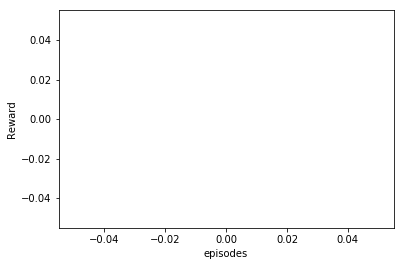

controls: 10, covered: 2
controls: 10, covered: 10


started url http://monstervape.com
controls: 10, covered: 10


started url http://docssmokeshop.com


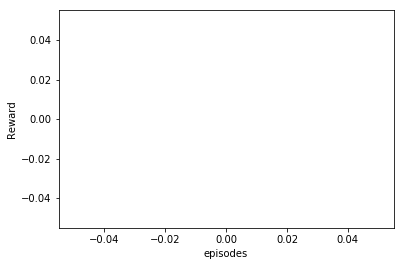

control: Control: link, label: , values: None, min: None, max = None
got probabilities: [2.9636345e-08 9.5446899e-07 1.0481076e-07 3.2700788e-02 9.6729815e-01]
got action: Do Nothing
controls: 10, covered: 7


started url http://monstervape.com
control: Control: link, label: , values: None, min: None, max = None
controls: 10, covered: 1
got probabilities: [2.9636345e-08 9.5446899e-07 1.0481076e-07 3.2700788e-02 9.6729815e-01]
got action: Do Nothing
controls: 10, covered: 3
reward: 0
controls: 10, covered: 2
got score: -1.2768843
estimated score: -1.2768843
control: Control: link, label: HOME, values: None, min: None, max = None
got probabilities: [4.6603120e-08 1.5823180e-06 1.8627190e-07 4.2196475e-02 9.5780164e-01]
got action: Do Nothing
controls: 10, covered: 9


started url http://theglamourshop.com
controls: 10, covered: 2
reward: 0
got score: -1.2768843
estimated score: -1.2768843


Exception in thread Thread-10:
Traceback (most recent call last):
  File "/home/aleksei/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/aleksei/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-4-872616ed5ca0>", line 9, in <lambda>
    thread = threading.Thread(target=lambda: worker.run())
  File "/home/aleksei/anaconda3/lib/python3.6/site-packages/tracing/rl/actor_learner.py", line 181, in run
    lr = self.get_lr(),
  File "/home/aleksei/anaconda3/lib/python3.6/site-packages/tracing/rl/actor_learner.py", line 123, in get_lr
    step = ActorLearnerWorker.global_step // steps_lr_decay
NameError: name 'steps_lr_decay' is not defined



controls: 10, covered: 3


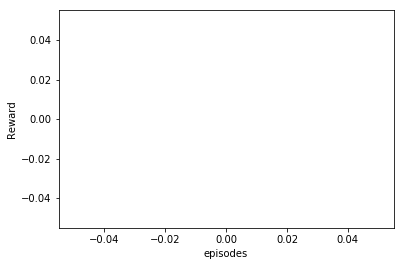

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

threads = []
for worker in workers:
    worker.max_steps = 10000
    worker.urls = popup_urls
    thread = threading.Thread(target=lambda: worker.run())
    thread.start()
    threads.append(thread)

while True:
    time.sleep(60)
    
    rewards = ActorLearnerWorker.step_rewards[:]
    if len(rewards) > 0:
        print('avg_reward:', sum(rewards) / len(rewards))
    plt.plot(np.arange(len(rewards)), rewards)
    plt.xlabel('episodes')
    plt.ylabel('Reward')
    plt.show()
    
coord.join(threads)

In [ ]:
from tracing.rl.actor_learner import ActionsMemory
from tracing.rl.environment import Environment
from tracing.rl.actions import *
from tracing.rl.a3cmodel import A3CModel
from tracing.rl.rewards import PopupRewardsCalculator
from tracing.rl.environment import Environment
from tracing.rl.actor_learner import ActorLearnerWorker
import tensorflow as tf
import threading


session.run(tf.global_variables_initializer())

env = Environment(PopupRewardsCalculator(), user={}, headless=True)
with env:
    memory = ActionsMemory(0.99)
    env.start('vape-fuel.com')
    controls = env.get_controls()
    worker = workers[0]
    for ctrl in controls:
        inp = env.get_control_as_input(ctrl)
        action_id = worker.local_model.get_action(inp)

        score = worker.local_model.estimate_score(inp)

        memory.append(inp, 2, 0)

    memory.set_final_score(100)

In [ ]:
# Test Environment Images
from PIL import Image
import numpy as np
from tracing.selenium_utils.common import *

env = Environment(PopupRewardsCalculator(), user={}, headless=True)

with env:
    env.start('enhancedecigs.com')
    ctrls = env.get_controls()
    inps = []
    for ctrl in ctrls:
        memory = ActionsMemory(0.99)

        inp = env.get_control_as_input(ctrl)
        inps.append(inp)
        memory.append(inp, 2, 0, ctrl)
        
batch = memory.to_input()

for i, inp in enumerate(inps):
    print(inp.shape)
    rgb = (inp * 128 + 128).astype(np.uint8)
    img = Image.fromarray(rgb, 'RGB')
    img.save('img-{}.png'.format(i))

In [ ]:
# Test Environment
from tracing.selenium_utils.common import *

env = Environment(PopupRewardsCalculator(), user={}, headless=False)

with env:
    env.start('enhancedecigs.com')

    ctrls = env.get_controls()
    assert len(ctrls) == 6

    dayCtrl = ctrls[0]
    monthCtrl = ctrls[1]
    yearCtrl = ctrls[2]
    check = ctrls[3]
    enter = ctrls[5]

    assert env.apply_action(dayCtrl, InputBDay()) == 0
    assert env.apply_action(monthCtrl, InputBMonth()) == 0
    assert env.apply_action(yearCtrl, InputBYear()) == 0
    assert env.apply_action(check, Click()) == 0
    assert env.apply_action(enter, Click()) == 100

    assert env.calc_final_reward() == 0


In [ ]:
# Test Popups Detecting

import time

rewards = PopupRewardsCalculator()

driver = create_chrome_driver()

for url in no_popup_urls:
    print('url: ', url)
    driver.get('http://' + url)
    time.sleep(2)
    assert not rewards.is_popup_exists(driver)

for url in popup_urls:
    print('url: ', url)
    driver.get('http://' + url)
    time.sleep(2)
    assert rewards.is_popup_exists(driver)

driver.quit()    